<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## Help Yelp

---

In this project you will be investigating a small version of the [Yelp challenge dataset](https://www.yelp.com/dataset_challenge). You'll practice using classification algorithms, cross-validation, gridsearching – all that good stuff.



---

### The data

There are 5 individual .csv files that have the information, zipped into .7z format like with the SF data last project. The dataset is located in your datasets folder:

    DSI-SF-2/datasets/yelp_arizona_data.7z

The columns in each are:

    businesses_small_parsed.csv
        business_id: unique business identifier
        name: name of the business
        review_count: number of reviews per business
        city: city business resides in
        stars: average rating
        categories: categories the business falls into (can be one or multiple)
        latitude
        longitude
        neighborhoods: neighborhoods business belongs to
        variable: "property" of the business (a tag)
        value: True/False for the property
        
    reviews_small_nlp_parsed.csv
        user_id: unique user identifier
        review_id: unique review identifier
        votes.cool: how many thought the review was "cool"
        business_id: unique business id the review is for
        votes.funny: how many thought the review was funny
        stars: rating given
        date: date of review
        votes.useful: how many thought the review was useful
        ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review
        
    users_small_parsed.csv
        yelping_since: signup date
        compliments.plain: # of compliments "plain"
        review_count: # of reviews:
        compliments.cute: total # of compliments "cute"
        compliments.writer: # of compliments "writer"
        compliments.note: # of compliments "note" (not sure what this is)
        compliments.hot: # of compliments "hot" (?)
        compliments.cool: # of compliments "cool"
        compliments.profile: # of compliments "profile"
        average_stars: average rating
        compliments.more: # of compliments "more"
        elite: years considered "elite"
        name: user's name
        user_id: unique user id
        votes.cool: # of votes "cool"
        compliments.list: # of compliments "list"
        votes.funny: # of compliments "funny"
        compliments.photos: # of compliments "photos"
        compliments.funny: # of compliments "funny"
        votes.useful: # of votes "useful"
       
    checkins_small_parsed.csv
        business_id: unique business identifier
        variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
        value: # of checkins at that time
    
    tips_small_nlp_parsed.csv
        user_id: unique user identifier
        business_id: unique business identifier
        likes: likes that the tip has
        date: date of tip
        ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. I'm not sure whether the compliments or votes are _by_ the user or _for_ the user.

---

If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

    Phoenix
    Surprise
    Las Vegas
    Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because I thought the mix of them was funny:

    Airports
    Breakfast & Brunch
    Bubble Tea
    Burgers
    Bars
    Bakeries
    Breweries
    Cafes
    Candy Stores
    Comedy Clubs
    Courthouses
    Dance Clubs
    Fast Food
    Museums
    Tattoo
    Vape Shops
    Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [129]:
# Load in the datasets:
biz = pd.read_csv('/Users/kiefer/github-repos/DSI-SF/datasets/yelp_arizona_data/businesses_small_parsed.csv')
chk = pd.read_csv('/Users/kiefer/github-repos/DSI-SF/datasets/yelp_arizona_data/checkins_small_parsed.csv')
rev = pd.read_csv('/Users/kiefer/github-repos/DSI-SF/datasets/yelp_arizona_data/reviews_small_nlp_parsed.csv')
tip = pd.read_csv('/Users/kiefer/github-repos/DSI-SF/datasets/yelp_arizona_data/tips_small_nlp_parsed.csv')
usr = pd.read_csv('/Users/kiefer/github-repos/DSI-SF/datasets/yelp_arizona_data/users_small_parsed.csv')

In [130]:
# Business data:
print biz.shape
print biz.columns
biz.head(1)

(152832, 11)
Index([u'business_id', u'name', u'review_count', u'city', u'stars',
       u'categories', u'latitude', u'longitude', u'neighborhoods', u'variable',
       u'value'],
      dtype='object')


,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...",33.448399,-112.071702,[],attributes.Ambience.divey,False


In [131]:
# Checkins data:
print chk.shape
print chk.columns
chk.head(1)

(214299, 3)
Index([u'business_id', u'variable', u'value'], dtype='object')


,business_id,variable,value
0,SG_gEmEXL4ID6RAEinC5Bg,checkin_info.9-0,1.0


In [132]:
# Review data:
print rev.shape
print rev.columns
rev.head(1)

(322398, 108)
Index([u'user_id', u'review_id', u'votes.cool', u'business_id', u'votes.funny',
       u'stars', u'date', u'votes.useful', u'10 minutes', u'15 minutes',
       ...
       u'service great', u'staff friendly', u'super friendly', u'sweet potato',
       u'tasted like', u'time vegas', u'try place', u've seen', u've tried',
       u'wait staff'],
      dtype='object', length=108)


,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
print tip.shape
print tip.columns
tip.head(1)

(101991, 104)
Index([u'user_id', u'business_id', u'likes', u'date', u'24 hours',
       u'amazing food', u'animal style', u'awesome food', u'awesome place',
       u'awesome service',
       ...
       u'service good', u'service great', u'slow service', u'staff friendly',
       u'staff great', u'steak eggs', u'super friendly', u'sweet potato',
       u'velvet pancakes', u'worth wait'],
      dtype='object', length=104)


,user_id,business_id,likes,date,24 hours,amazing food,animal style,awesome food,awesome place,awesome service,...,service good,service great,slow service,staff friendly,staff great,steak eggs,super friendly,sweet potato,velvet pancakes,worth wait
0,trdsekNRD-gIs50EBrScwA,EmzaQR5hQlF0WIl24NxAZA,0,2012-02-27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
print usr.shape
print usr.columns
usr.head(1)

(144206, 21)
Index([u'yelping_since', u'compliments.plain', u'review_count',
       u'compliments.cute', u'compliments.writer', u'fans',
       u'compliments.note', u'compliments.hot', u'compliments.cool',
       u'compliments.profile', u'average_stars', u'compliments.more', u'elite',
       u'name', u'user_id', u'votes.cool', u'compliments.list', u'votes.funny',
       u'compliments.photos', u'compliments.funny', u'votes.useful'],
      dtype='object')


,yelping_since,compliments.plain,review_count,compliments.cute,compliments.writer,fans,compliments.note,compliments.hot,compliments.cool,compliments.profile,...,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
0,2004-10,959.0,1274,206.0,327.0,1179,611.0,1094.0,1642.0,116.0,...,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199


In [135]:
# Drop the location columns from biz
biz.drop(['latitude','longitude','neighborhoods'], axis=1, inplace=True)

In [136]:
biz.dtypes

business_id      object
name             object
review_count      int64
city             object
stars           float64
categories       object
variable         object
value            object
dtype: object

In [137]:
# Take a look at the categories column:
biz.categories[0:2]

0    ['American (New)', 'Nightlife', 'Dance Clubs',...
1                 ['Bars', 'Nightlife', 'Dance Clubs']
Name: categories, dtype: object

In [138]:
# How many attributes/properties are there?
sorted(biz.variable.unique())

['attributes.Accepts Credit Cards',
 'attributes.Accepts Insurance',
 'attributes.Ages Allowed',
 'attributes.Alcohol',
 'attributes.Ambience.casual',
 'attributes.Ambience.classy',
 'attributes.Ambience.divey',
 'attributes.Ambience.hipster',
 'attributes.Ambience.intimate',
 'attributes.Ambience.romantic',
 'attributes.Ambience.touristy',
 'attributes.Ambience.trendy',
 'attributes.Ambience.upscale',
 'attributes.Attire',
 'attributes.BYOB',
 'attributes.BYOB/Corkage',
 'attributes.By Appointment Only',
 'attributes.Caters',
 'attributes.Coat Check',
 'attributes.Corkage',
 'attributes.Delivery',
 'attributes.Dietary Restrictions.dairy-free',
 'attributes.Dietary Restrictions.gluten-free',
 'attributes.Dietary Restrictions.halal',
 'attributes.Dietary Restrictions.kosher',
 'attributes.Dietary Restrictions.soy-free',
 'attributes.Dietary Restrictions.vegan',
 'attributes.Dietary Restrictions.vegetarian',
 'attributes.Dogs Allowed',
 'attributes.Drive-Thru',
 'attributes.Good For Danc

In [139]:
# How many per attribute?
biz.variable.value_counts()

open                                           4132
attributes.Accepts Credit Cards                3896
attributes.Price Range                         3843
attributes.Parking.valet                       3427
attributes.Parking.street                      3427
attributes.Parking.validated                   3427
attributes.Parking.garage                      3427
attributes.Parking.lot                         3427
attributes.Good For Groups                     3362
attributes.Outdoor Seating                     3267
attributes.Has TV                              3084
attributes.Alcohol                             3050
attributes.Good for Kids                       2909
attributes.Ambience.trendy                     2873
attributes.Ambience.touristy                   2873
attributes.Ambience.classy                     2873
attributes.Ambience.romantic                   2873
attributes.Ambience.intimate                   2873
attributes.Ambience.casual                     2873
attributes.A

In [140]:
# Remove attributes corresponding to "dietary" or "insurance" since they are so rare.
remove_attributes = [a for a in biz.variable.unique() if '.Dietary' in a or 'Insurance' in a]

biz = biz[~biz.variable.isin(remove_attributes)]

In [141]:
# widen the dataset, moving the attributes into columns (aggfunc is just taking the first
# element, there should only be one thing to fill into cells)
def choose_first(x):
    return x.values[0]

bizw = pd.pivot_table(biz, values=['value'], columns=['variable'], index=['business_id','name',
                                                                         'review_count','city','stars',
                                                                         'categories'],
                     aggfunc=choose_first)

In [142]:
bizw = bizw['value'].reset_index()

In [143]:
bizw.head(1)

variable,business_id,name,review_count,city,stars,categories,attributes.Accepts Credit Cards,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",True,None,none,None,...,None,None,None,None,None,None,None,None,None,True


In [144]:
# This funtion maps the hours to more broad time ranges:
# 12am-6am
# 6am-12pm
# 12pm-6pm
# 6pm-12am
def timemapper(x):
    try:
        hr = int(x.strip().split(':')[0])
        if hr >= 0 and hr < 6:
            return '12am_6am'
        elif hr > 6 and hr <= 12:
            return '6am_12pm'
        elif hr > 12 and hr <= 18:
            return '12pm_6pm'
        else:
            return '6pm_12am'
    except:
        return 'unlisted'

In [145]:
# convert time columns if they have hours in the title, otherwise make the columns binary 1/0
for col in bizw.columns[6:]:
    if 'hours.' in col:
        bizw[col] = bizw[col].map(timemapper)
    else:
        bizw[col] = bizw[col].map(lambda x: 1 if x == 'True' else 0)

In [146]:
# Make the categories column python lists from strings using eval
bizw.categories = bizw.categories.map(lambda x: eval(x))

In [147]:
bizw.shape

(4132, 76)

In [148]:
# Get a list of the unique categories by iterating through the categories column
unique_categories = []
for bc in bizw.categories.values:
    unique_categories.extend(bc)
unique_categories = np.unique(unique_categories)

In [149]:
# make a new column for each of the unique categories.
# if the category is inside the categories column on that row,
# mark it with a 1
for uc in unique_categories:
    bizw[uc] = bizw.categories.map(lambda x: 1 if uc in x else 0)

In [150]:
# find the counds of the categories
print len(unique_categories)
category_counts = bizw.iloc[:,-len(unique_categories):].sum().reset_index()
category_counts.columns = ['column','colsum']
category_counts.sort_values('colsum', ascending=False, inplace=True)

210


In [151]:
category_counts.colsum.describe()

count     210.000000
mean       68.757143
std       253.676607
min         1.000000
25%         2.000000
50%         5.000000
75%        31.500000
max      2692.000000
Name: colsum, dtype: float64

In [152]:
# only keep business categories that appear at least 5 times (the median).
drop_cats = category_counts[category_counts.colsum < 5].column.values
bizw.drop(drop_cats, inplace=True, axis=1)
bizw.shape

(4132, 187)

In [153]:
# make a dataframe that has the review counts per business ID:
rev_bizcounts = rev.business_id.value_counts().reset_index()
rev_bizcounts.columns = ['business_id','review_count']
rev_bizcounts.head(3)

,business_id,review_count
0,4bEjOyTaDG24SY5TxsaUNQ,5042
1,aGbjLWzcrnEx2ZmMCFm3EA,3405
2,QbmcCE_cLq4WO8ZMKImaLw,2704


In [154]:
# now make an aggregated review dataframe where it is the percent of times certain
# phrases were said in all the reviews for that business

revagg = rev.drop(['user_id','votes.cool','votes.funny','stars','date','votes.useful'], axis=1)
revagg = revagg.groupby('business_id').agg(np.sum).reset_index()
revagg = revagg.merge(rev_bizcounts, on='business_id')

revagg.iloc[:, 1:] = revagg.iloc[:, 1:].div(revagg.review_count.astype(np.float), axis=0)
revagg.drop('review_count', axis=1, inplace=True)

revagg.head(3)


,business_id,10 minutes,15 minutes,20 minutes,30 minutes,bar food,beer selection,best ve,bloody mary,bottle service,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,--jFTZmywe7StuZ2hEjxyA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,-0HGqwlfw3I8nkJyMHxAsQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111
2,-0VK5Z1BfUHUYq4PoBYNLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [155]:
# remove spaces from the columns and tag with prefix "rev_"
revagg.columns = ['business_id']+['rev_'+x.strip().replace(' ','_') for x in revagg.columns[1:]]

# remove anything that says "vegas" since it is cheating to keep it in.
revagg = revagg[[c for c in revagg.columns if not 'vegas' in c]]

In [156]:
# Do the same as above, but for the tips data:
tip_bizcounts = tip.business_id.value_counts().reset_index()
tip_bizcounts.columns = ['business_id','tip_count']
tip_bizcounts.head(3)

tipagg = tip.drop(['user_id','likes','date'], axis=1)
tipagg = tipagg.groupby('business_id').agg(np.sum).reset_index()
tipagg = tipagg.merge(tip_bizcounts, on='business_id')
tipagg.iloc[:, 1:] = tipagg.iloc[:, 1:].div(tipagg.tip_count.astype(np.float), axis=0)
tipagg.drop('tip_count', axis=1, inplace=True)
tipagg.head(3)

,business_id,24 hours,amazing food,animal style,awesome food,awesome place,awesome service,beef hash,beer selection,best breakfast,...,service good,service great,slow service,staff friendly,staff great,steak eggs,super friendly,sweet potato,velvet pancakes,worth wait
0,--jFTZmywe7StuZ2hEjxyA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0HGqwlfw3I8nkJyMHxAsQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0VK5Z1BfUHUYq4PoBYNLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# remove the spaces and vegas stuff:
tipagg.columns = ['business_id']+['tip_'+x.strip().replace(' ','_') for x in tipagg.columns[1:]]
tipagg = tipagg[[c for c in tipagg.columns if not 'vegas' in c]]

In [158]:
print revagg.shape, tipagg.shape

(4132, 99) (3752, 100)


In [159]:
# make a new las vegas dataframe that will combine them
lv = bizw.copy()

In [160]:
# merge the reviews and tips aggregate stuff on business_id
lv = lv.merge(revagg, on='business_id', how='left')
lv = lv.merge(tipagg, on='business_id', how='left')
print lv.shape

(4132, 384)


In [161]:
# fill any nas with 0
lv = lv.fillna(0.)

In [162]:
lv.head(2)

variable,business_id,name,review_count,city,stars,categories,attributes.Accepts Credit Cards,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,...,tip_service_good,tip_service_great,tip_slow_service,tip_staff_friendly,tip_staff_great,tip_steak_eggs,tip_super_friendly,tip_sweet_potato,tip_velvet_pancakes,tip_worth_wait
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"[Fast Food, Sandwiches, Restaurants]",1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.0,"[Burgers, Fast Food, Restaurants]",1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
# Take out the columns irrelevant for prediction
# (I don't want review count)
lv = lv.drop(['business_id','name','review_count','categories'], axis=1)

In [164]:
# make las vegas 1 and all other cities 0
lv.city = lv.city.map(lambda x: 1 if x == 'Las Vegas' else 0)

In [165]:
# take out anything not a letter or number and make lowercase:
newcols = [''.join([x if x in 'abcdefghijklmnopqrstuvwxyz0123456789' else '_' for x in c.lower()]) for c in lv.columns]
lv.columns = newcols

In [166]:
# Load models and such
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
import patsy

In [167]:
# a hack to make patsy work on a big formula. be careful with this...
import sys
sys.setrecursionlimit(10000) 

In [168]:
# make the X and y
f = 'city ~ '+' + '.join([c for c in lv.columns if c != 'city'])+' -1'
y, X = patsy.dmatrices(f, data=lv, return_type='dataframe')

y = np.ravel(y)

In [169]:
# standardize X
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [170]:
print Xn.shape

(4132, 422)


In [171]:
# Search for a good logistic regression with l1 or l2 penalties. 
# My C values here are pretty low. I want regularization here so
# I don't care if the lowest strength is still fairly high.

lr_params = {
    'solver':['liblinear'],
    'C':np.logspace(-4, -1, 150),
    'penalty':['l1','l2']
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(Xn, y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   15.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   34.7s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:  2.9min
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  5.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.0001 ,  0.0001 , ...,  0.09547,  0.1    ]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [172]:
# best score in gridsearch as well as baseline score:
print lr_gs.best_score_
print np.mean(y)

0.700387221684
0.621974830591


In [173]:
# best parameters
lr_gs.best_params_

{'C': 0.016397026580002055, 'penalty': 'l2', 'solver': 'liblinear'}

In [174]:
lr = lr_gs.best_estimator_

In [175]:
# cross-validate it on 10 fold just to see
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(lr, Xn, y, cv=10)
print scores
print np.mean(scores)

[ 0.66908213  0.66908213  0.69733656  0.71186441  0.72154964  0.70217918
  0.72639225  0.67554479  0.69491525  0.72881356]
0.699675989285


In [176]:
# fit it on the data in full:
lr.fit(Xn, y)

LogisticRegression(C=0.016397026580002055, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [177]:
# make the coefs dataframe
coefs = pd.DataFrame({
        'coef':lr.coef_[0],
        'predictor':X.columns
    })

In [178]:
# print out the coefs sorted by largerst absolute value first
coefs['abscoef'] = np.abs(coefs.coef)
coefs.sort_values('abscoef', ascending=False, inplace=True)
coefs.drop('abscoef', inplace=True, axis=1)
coefs[coefs.coef != 0]

# About las vegas (from the coefs):
# (Ignoring the time open/closed ones, since they don't have any
# info in them i can make a good conclusion from.)
# + garage parking
# - no outdoor seating
# - no take out food
# + "definitely come"
# + good for groups
# - brunch
# + "food amazing"
# + pilates
# - restaurants
# - canadian food
# + casinos
# + swimming pools
# + chicken & waffles
# + juice bars
# + "great service"


,coef,predictor
100,-0.405493,attributes_outdoor_seating
101,0.394380,attributes_parking_garage
238,0.254824,rev_definitely_come
81,0.244790,attributes_good_for_groups
129,-0.205762,breakfast___brunch
250,0.195159,rev_food_amazing
196,0.193721,pilates
201,-0.185793,restaurants
135,-0.185017,canadian__new_
108,-0.171097,attributes_take_out


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [52]:
rev.head(1)

,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# make a list of the service columns
service_cols = ['customer service', 'food service', 'friendly staff', 'good service',
                'great service', 'service excellent', 'service food', 'service friendly',
                'service good', 'service great', 'staff friendly', 'super friendly', 'wait staff']

In [54]:
# create a reviews dataset with just words, user_id, business_id and stars
revbiz = rev[['user_id','business_id','stars']+rev.columns[8:].tolist()]
revbiz.head()

,user_id,business_id,stars,10 minutes,15 minutes,20 minutes,30 minutes,bar food,beer selection,best ve,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,EmzaQR5hQlF0WIl24NxAZA,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sEWeeq41k4ohBz4jS_iGRw,EmzaQR5hQlF0WIl24NxAZA,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1AqEqmmVHgYCuzcMrF4h2g,EmzaQR5hQlF0WIl24NxAZA,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pv82zTlB5Txsu2Pusu__FA,EmzaQR5hQlF0WIl24NxAZA,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,EmzaQR5hQlF0WIl24NxAZA,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# count up how many times service comments were said per review and make it a column.
revbiz['service_mentions'] = revbiz[service_cols].sum(axis=1)
revbiz.service_mentions.describe()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


count    322398.000000
mean          0.217228
std           0.498762
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: service_mentions, dtype: float64

In [56]:
# 95th perecentie of service mentions in reviews:
np.percentile(revbiz.service_mentions.values, 95)

1.0

In [57]:
# make a service and non-service review dataset
# "service" reviews need to have at least 2 service related comments in them.
service_reviews = revbiz[revbiz.service_mentions >= 2]
non_service_reviews = revbiz[revbiz.service_mentions < 2]
print service_reviews.shape, non_service_reviews.shape

(9826, 104) (312572, 104)


In [58]:
# make sure they both have the same business_ids in them
serve_bizids = service_reviews.business_id.unique()
non_service_reviews = non_service_reviews[non_service_reviews.business_id.isin(serve_bizids)]
non_service_reviews.shape

(272559, 104)

In [59]:
# calculate the average service ratings per business id:
avg_serve_ratings = service_reviews.groupby('business_id')['stars'].mean().reset_index()
avg_serve_ratings.columns = ['business_id','avg_serve_stars']
avg_serve_ratings.head()

,business_id,avg_serve_stars
0,-1bOb2izeJBZjHC7NWxiPA,4.285714
1,-3xbryp44xhpN4BohxXDdQ,3.916667
2,-4mNZfAXMd2mxEsD2YRcaQ,4.000000
3,-584fn2GxYe9sLsgN2WeQA,4.642857
4,-5RN56jH78MV2oquLV_G8g,4.240000


In [60]:
# calculate the average non-service ratings per business_id
avg_non_ratings = non_service_reviews.groupby('business_id')['stars'].mean().reset_index()
avg_non_ratings.columns = ['business_id','avg_nonserve_stars']
avg_non_ratings.head()

,business_id,avg_nonserve_stars
0,-1bOb2izeJBZjHC7NWxiPA,3.980000
1,-3xbryp44xhpN4BohxXDdQ,3.857895
2,-4mNZfAXMd2mxEsD2YRcaQ,2.888889
3,-584fn2GxYe9sLsgN2WeQA,4.101322
4,-5RN56jH78MV2oquLV_G8g,4.385069


In [61]:
# make a new business review dataframe with only the busninesses we selected for above
# sum up the columns per business
br = rev[['business_id']+rev.columns[8:].tolist()]
br = br[br.business_id.isin(serve_bizids)]
br = br.groupby('business_id').agg(np.sum).reset_index()
br.head()


,business_id,10 minutes,15 minutes,20 minutes,30 minutes,bar food,beer selection,best ve,bloody mary,bottle service,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,-1bOb2izeJBZjHC7NWxiPA,0,1,0,2,0,0,0,0,0,...,3,4,3,0,2,0,0,2,0,1
1,-3xbryp44xhpN4BohxXDdQ,1,1,3,1,1,1,0,2,0,...,4,1,3,0,2,0,1,0,1,5
2,-4mNZfAXMd2mxEsD2YRcaQ,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,-584fn2GxYe9sLsgN2WeQA,7,2,0,0,0,2,1,0,0,...,13,10,9,1,4,1,4,3,4,2
4,-5RN56jH78MV2oquLV_G8g,4,18,2,7,0,0,6,0,0,...,14,4,0,1,19,10,3,4,5,15


In [62]:
# convert the word columns to percent
br['rev_count'] = br.iloc[:, 1:].sum(axis=1)
br.iloc[:, 1:] = br.iloc[:, 1:].div(br.rev_count.astype(np.float), axis=0)
br.drop('rev_count', axis=1, inplace=True)
br.head(3)

,business_id,10 minutes,15 minutes,20 minutes,30 minutes,bar food,beer selection,best ve,bloody mary,bottle service,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,-1bOb2izeJBZjHC7NWxiPA,0.000000,0.006061,0.000000,0.012121,0.000000,0.000000,0.0,0.000000,0.0,...,0.018182,0.024242,0.018182,0.0,0.012121,0.000000,0.000000,0.012121,0.000000,0.006061
1,-3xbryp44xhpN4BohxXDdQ,0.003115,0.003115,0.009346,0.003115,0.003115,0.003115,0.0,0.006231,0.0,...,0.012461,0.003115,0.009346,0.0,0.006231,0.000000,0.003115,0.000000,0.003115,0.015576
2,-4mNZfAXMd2mxEsD2YRcaQ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.058824,0.000000,0.0,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000


In [63]:
# merge the service and non-service ratings
br = br.merge(avg_serve_ratings, on='business_id')
br = br.merge(avg_non_ratings, on='business_id')
br.head()

,business_id,10 minutes,15 minutes,20 minutes,30 minutes,bar food,beer selection,best ve,bloody mary,bottle service,...,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff,avg_serve_stars,avg_nonserve_stars
0,-1bOb2izeJBZjHC7NWxiPA,0.000000,0.006061,0.000000,0.012121,0.000000,0.000000,0.000000,0.000000,0.0,...,0.018182,0.000000,0.012121,0.000000,0.000000,0.012121,0.000000,0.006061,4.285714,3.980000
1,-3xbryp44xhpN4BohxXDdQ,0.003115,0.003115,0.009346,0.003115,0.003115,0.003115,0.000000,0.006231,0.0,...,0.009346,0.000000,0.006231,0.000000,0.003115,0.000000,0.003115,0.015576,3.916667,3.857895
2,-4mNZfAXMd2mxEsD2YRcaQ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,4.000000,2.888889
3,-584fn2GxYe9sLsgN2WeQA,0.016908,0.004831,0.000000,0.000000,0.000000,0.004831,0.002415,0.000000,0.0,...,0.021739,0.002415,0.009662,0.002415,0.009662,0.007246,0.009662,0.004831,4.642857,4.101322
4,-5RN56jH78MV2oquLV_G8g,0.005291,0.023810,0.002646,0.009259,0.000000,0.000000,0.007937,0.000000,0.0,...,0.000000,0.001323,0.025132,0.013228,0.003968,0.005291,0.006614,0.019841,4.240000,4.385069


In [64]:
# replace the spaces in columns
br.columns = [x.strip().replace(' ','_') for x in br.columns]

In [65]:
# set up service and non-service X, y
ys = br.avg_serve_stars.values
yns = br.avg_nonserve_stars.values

X = br[[c for c in br.columns if not c in ['business_id','avg_serve_stars','avg_nonserve_stars']]]

ss = StandardScaler()
Xs_n = ss.fit_transform(X)
Xns_n = ss.fit_transform(X)

In [83]:
# Set up a LassoCV search for both
#
# Note: I am specifically using a Lasso here instead of ridge or elastic net, because
# I want to avoid the "shrinkage" effect of the L2 penalty. If coefficients are
# more likely to be zeroed-out than shrunk, then when I compare them side-by-side
# I don't have to worry nearly as much about differences in magnitude, aka the
# degree to which the coefficients were shrunk down towards zero.
from sklearn.linear_model import LassoCV, Lasso

lcv_s = LassoCV(n_alphas=1000, cv=10, verbose=1)
lcv_ns = LassoCV(n_alphas=1000, cv=10, verbose=1)

In [85]:
# fit the service rating model
lcv_s.fit(Xs_n, ys)

lasso_s = Lasso(alpha=lcv_s.alpha_)
lasso_s.fit(Xs_n, ys)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso(alpha=0.025483613704337143, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
# fit the non-service rating model
lcv_ns.fit(Xns_n, yns)

lasso_ns = Lasso(alpha=lcv_ns.alpha_)
lasso_ns.fit(Xns_n, yns)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Lasso(alpha=0.0074736424207689413, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
# what are the model cross-validation scores?
print np.mean(cross_val_score(lasso_s, Xs_n, ys, cv=5))
print np.mean(cross_val_score(lasso_ns, Xns_n, yns, cv=5))


0.190059865418
0.527966780228


In [88]:
# put the service and non-service model coefficients into the same
# dataframe so I can compare them.
coefs = pd.DataFrame({
        'service_coef':lasso_s.coef_,
        'sabs':np.abs(lasso_s.coef_),
        'non_coef':lasso_ns.coef_,
        'nabs':np.abs(lasso_ns.coef_),
        'predictor':X.columns
    })

In [89]:
# print out the coefficients sorted by absolute value of service coefficients.
# looks like the service related fields, unexpectedly, have higher magnitude
# coefficients than the non-service coefficients.
coefs.sort_values('sabs', ascending=False).reset_index().loc[:10, ['predictor','service_coef','non_coef']]

,predictor,service_coef,non_coef
0,customer_service,-0.218731,-0.093596
1,service_excellent,0.116146,0.049316
2,super_friendly,0.099363,0.062888
3,love_place,0.089625,0.095758
4,service_great,0.086213,0.017737
5,highly_recommend,0.085233,0.138138
6,definitely_come,0.070481,0.044617
7,10_minutes,-0.069108,-0.045213
8,pretty_good,-0.063720,-0.034007
9,20_minutes,-0.060970,-0.054673


In [77]:
# now sort by the non-service magnitude coefficients. Customer service is still
# important but looks like other things like food now take some precedence as well.
# fewer service-related mentions.
coefs.sort_values('nabs', ascending=False).reset_index().loc[:10, ['predictor','service_coef','non_coef']]

,predictor,service_coef,non_coef
0,highly_recommend,0.078442,0.110635
1,love_place,0.084626,0.080271
2,customer_service,-0.191590,-0.070471
3,didn_want,-0.029814,-0.057104
4,looked_like,-0.053962,-0.055377
5,great_food,0.049403,0.054461
6,super_friendly,0.091363,0.054290
7,15_minutes,-0.032877,-0.054032
8,definitely_recommend,0.044843,0.053038
9,las_vegas,0.041937,0.052260


In [91]:
# how do magnitudes of coefs compare for the service columns?
# patterns here indicate that these service columns are indeed more
# impactful to the average service rating than the non-service rating.
scols = [x.strip().replace(' ','_') for x in service_cols]
coefs.loc[coefs.predictor.isin(scols), ['predictor','service_coef','non_coef']]

,predictor,service_coef,non_coef
10,customer_service,-0.218731,-0.093596
31,food_service,-0.006596,-0.018128
36,friendly_staff,0.049296,0.000000
39,good_service,-0.000000,-0.041446
46,great_service,0.042212,0.016539
86,service_excellent,0.116146,0.049316
87,service_food,0.025248,-0.041217
88,service_friendly,0.000000,0.001324
89,service_good,-0.000000,-0.031360
90,service_great,0.086213,0.017737


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [92]:
usr.columns

Index([u'yelping_since', u'compliments.plain', u'review_count',
       u'compliments.cute', u'compliments.writer', u'fans',
       u'compliments.note', u'compliments.hot', u'compliments.cool',
       u'compliments.profile', u'average_stars', u'compliments.more', u'elite',
       u'name', u'user_id', u'votes.cool', u'compliments.list', u'votes.funny',
       u'compliments.photos', u'compliments.funny', u'votes.useful'],
      dtype='object')

In [93]:
# Find out who's elite: the years they were elite and just a binary
# on whether they were ever elite at all.
usr['elite_list'] = usr.elite.map(lambda x: eval(x))
usr['years_elite'] = usr.elite_list.map(lambda x: len(x))
usr['ever_elite'] = usr.years_elite.map(lambda x: 1 if x > 0 else 0)

In [94]:
usr.years_elite.describe()

count    144206.000000
mean          0.362953
std           1.199497
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: years_elite, dtype: float64

In [95]:
# replace dots with underscores and fill na columns to be zeros
usr.columns = [c.strip().replace('.','_') for c in usr.columns]
usr = usr.fillna(0.)

In [96]:
# Make an X, y to predict whether a user was ever elite from their 
# stats in the user dataframe
non_pred = ['user_id','ever_elite','elite','years_elite','elite_list','yelping_since',
            'name']
usr_basic_f = '~ '+' + '.join([c for c in usr.columns if not c in non_pred])+' -1'

X = patsy.dmatrix(usr_basic_f, data=usr, return_type='dataframe')
y = usr.ever_elite.values

In [97]:
y = np.ravel(y)
ss = StandardScaler()
Xn = ss.fit_transform(X)
print y.shape, Xn.shape

(144206,) (144206, 17)


In [99]:
print 'baseline accuracy:', 1. - np.mean(y)

baseline accuracy: 0.884727403853


In [100]:
# search for best model with SGDClassifier
# logistic regression ridge or lasso penalties (not doing elastic net
# for the sake of my computer).
ever_elite_p = {
    'loss':['log'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5, 1, 100)
}

ee_gs = GridSearchCV(SGDClassifier(), ever_elite_p, cv=5, verbose=1)
ee_gs.fit(Xn, y)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   33.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['log'], 'alpha': array([  1.00000e-05,   1.14976e-05, ...,   8.69749e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [102]:
# Accuracy is considerably better than the baseline.
# Chose a very weak ridge. Basically a vanilla logistic regression.
print ee_gs.best_params_
print ee_gs.best_score_


{'penalty': 'l2', 'alpha': 2.0092330025650458e-05, 'loss': 'log'}
0.950126901793


In [103]:
ee_best = ee_gs.best_estimator_
ee_best.fit(Xn, y)
print np.mean(cross_val_score(ee_best, Xn, y, cv=5))

0.948164468407


In [110]:
# So some odd things here:
# seems like profile compliments are strong negative predictors, 
# whereas writer and cool compliments are positive.
# note compliments are also netative.
# votes on usefulness and the number of reviews are not surprisingly
# positive predictors.
# it's cool that votes on how funny a user's reviews are the less
# likely they are to be elite. Yelp is a serious place!
coefs = pd.DataFrame({'coef':ee_best.coef_[0],
                      'predictor':X.columns,
                      'absc':np.abs(ee_best.coef_[0])})

coefs.sort_values('absc', inplace=True, ascending=False)
coefs.drop('absc', inplace=True, axis=1)

coefs

,coef,predictor
8,-8.219395,compliments_profile
3,6.678037,compliments_writer
7,3.366542,compliments_cool
5,-3.010809,compliments_note
16,2.865184,votes_useful
1,2.785620,review_count
13,-2.470023,votes_funny
2,1.447963,compliments_cute
14,-1.265400,compliments_photos
0,-1.235623,compliments_plain


In [111]:
# Let's predict instead from a person's review whether they are currently elite.
# we'll need the review dataset again, and merge the list of elite years on
# user id:
revusr = rev.merge(usr[['user_id','elite_list']], on='user_id')

In [112]:
# make the date a datetime column
revusr.date = pd.to_datetime(revusr.date, infer_datetime_format=True)

In [113]:
# make a column whether they were elite during that review or not using
# the date and elite_list column
revusr['elite'] = map(lambda x: 1 if x[0] in x[1] else 0,
                      zip(revusr.date.dt.year, revusr.elite_list.values))

In [114]:
# Make the X, y. We will predict their elite status based on what they
# are saying in the review.
non_preds = [u'user_id', u'review_id', u'votes.cool', u'business_id', u'votes.funny',
       u'stars', u'date', u'votes.useful','elite_list','elite']

y = revusr.elite.values
X = revusr[[c for c in revusr.columns if not c in non_preds]]

In [115]:
# yikes its big.
ss = StandardScaler()
Xn = ss.fit_transform(X)
print Xn.shape

(322398, 100)


In [116]:
# alright well this one is going to take forever. I'll just search
# 35 alphas here for the sake of time.
el_rev_p = {
    'loss':['log'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5, 1, 35)
}

el_rev_gs = GridSearchCV(SGDClassifier(), el_rev_p, cv=5, verbose=1)
el_rev_gs.fit(Xn, y)


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  5.5min
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  9.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['log'], 'alpha': array([  1.00000e-05,   1.50131e-05,   2.25393e-05,   3.38386e-05,
         5.08022e-05,   7.62699e-05,   1.14505e-04,   1.71907e-04,
         2.58086e-04,   3.87468e-04,   5.81709e-04,   8.73326e-04,
         1.31113e-03,   1.96842e-03,...,   1.31113e+00,   1.96842e+00,   2.95521e+00,
         4.43669e+00,   6.66085e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [117]:
el_rev_best = el_rev_gs.best_estimator_
print el_rev_gs.best_score_
print el_rev_gs.best_params_

0.782619619228
{'penalty': 'l1', 'alpha': 0.022539339047347912, 'loss': 'log'}


In [119]:
print 'baseline:', 1.-np.mean(y)

baseline: 0.782619619228


In [120]:
print el_rev_best.coef_

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [121]:
# Well it looks like, based at least on using the 100 different common 
# review phrases, I am not able to actually predict whether someone is 
# an elite user or not when they made the review. I suppose I should
# not be too surprised by this result. Perhaps it would have worked
# out better if I had more than just these 100 columns of phrases and
# could examine the words with more in-depth NLP. Should work, considering
# that being a good writer was a predictor of someone being an elite user.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?

In [186]:
uc = [''.join([x if x in 'abcdefghijklmnopqrstuvwxyz0123456789' else '_' for x in c.lower()]) for c in unique_categories]

In [180]:
lv.shape

(4132, 380)

In [216]:
# Lets look at restaurants as the big category and wine as the small one
rest = lv.restaurants.values
wine = lv.wine_bars.values

# remove the categories from the "las vegas" dataframe (we wont use city either).
lv_nocat = lv[[c for c in lv.columns if not c in uc+['city']]]

In [197]:
# make the X
f = '~ '+' + '.join([c for c in lv_nocat.columns if c != 'city'])+' -1'
X = patsy.dmatrix(f, data=lv_nocat, return_type='dataframe')

In [198]:
print X.shape
X.columns

(4132, 311)


Index([u'hours_friday_close[12am_6am]', u'hours_friday_close[12pm_6pm]',
       u'hours_friday_close[6am_12pm]', u'hours_friday_close[6pm_12am]',
       u'hours_friday_close[unlisted]', u'hours_friday_open[T.12pm_6pm]',
       u'hours_friday_open[T.6am_12pm]', u'hours_friday_open[T.6pm_12am]',
       u'hours_friday_open[T.unlisted]', u'hours_monday_close[T.12pm_6pm]',
       ...
       u'tip_service_good', u'tip_service_great', u'tip_slow_service',
       u'tip_staff_friendly', u'tip_staff_great', u'tip_steak_eggs',
       u'tip_super_friendly', u'tip_sweet_potato', u'tip_velvet_pancakes',
       u'tip_worth_wait'],
      dtype='object', length=311)

In [209]:
# set up logistic regression gridsearches for each
grid_params = {
    'loss':['log'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5,1,100)
}

rest_gs = GridSearchCV(SGDClassifier(), grid_params, cv=5, verbose=1)


In [218]:
wine_gs = GridSearchCV(SGDClassifier(), grid_params, cv=5, verbose=1)

In [210]:
# standardize X
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [211]:
# Fit the restaurants gridsearch
rest_gs.fit(Xn, rest)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   17.4s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   31.3s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   39.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['log'], 'alpha': array([  1.00000e-05,   1.14976e-05, ...,   8.69749e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [219]:
# fit the wine gridsearch
wine_gs.fit(Xn, wine)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:   17.4s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   30.9s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   38.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'loss': ['log'], 'alpha': array([  1.00000e-05,   1.14976e-05, ...,   8.69749e+00,   1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [220]:
# Check against baseline
print rest_gs.best_score_, np.mean(rest)
print wine_gs.best_score_, 1. - np.mean(wine)

0.954017424976 0.651500484027
0.980880929332 0.979670861568


In [222]:
# What predicts wine bars? reservations, hapy hours, waiter service... looks legit.
coefs = pd.DataFrame({'coef':wine_gs.best_estimator_.coef_[0],
                      'predictor':X.columns,
                      'absc':np.abs(wine_gs.best_estimator_.coef_[0])})

coefs.sort_values('absc', inplace=True, ascending=False)
coefs.drop('absc', inplace=True, axis=1)

coefs

,coef,predictor
109,2.443069,attributes_takes_reservations
89,2.155598,attributes_happy_hour
110,1.598556,attributes_waiter_service
35,1.299891,hours_thursday_close[T.6pm_12am]
85,1.258986,attributes_good_for_dinner
95,1.185533,attributes_music_live
103,1.185336,attributes_parking_street
27,1.149885,hours_sunday_close[T.6pm_12am]
51,1.127153,hours_wednesday_close[T.6pm_12am]
19,1.078185,hours_saturday_close[T.6pm_12am]


In [223]:
# make the confusion matrices
rest_cm = pd.crosstab(rest, rest_gs.predict(Xn), 
                       rownames=['Actual'], colnames=['Predicted'], 
                       margins=True)

wine_cm = pd.crosstab(wine, wine_gs.predict(Xn), 
                      rownames=['Actual'], colnames=['Predicted'], 
                      margins=True)

In [224]:
# For restaurants the model is almost always getting it right, whether it be
# true positives or true negatives.
rest_cm

Predicted,0,1,All
Actual,,,
0,1376,64,1440
1,72,2620,2692
All,1448,2684,4132


In [225]:
# For wine bars, it tends to miss more than it "should". It only guesses
# that something is a wine bar 44 times, when there are in fact 84 
# wine bars. This is likely because there are SO many more other categories.
# It's actually great that it can get 28 of them, considering the crazy
# imbalance.
wine_cm

Predicted,0,1,All
Actual,,,
0,4032,16,4048
1,56,28,84
All,4088,44,4132


In [240]:
# Write a function for getting the stats required to plot a ROC
# and precision-recall curve.
from sklearn.metrics import (roc_auc_score, roc_curve, precision_recall_curve, 
                             average_precision_score, f1_score, auc)

def get_stats(lr, X, y):

    y_pp = lr.predict_proba(X)[:, 1]
    y_pred = lr.predict(X)

    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)

    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    f1 = f1_score(y, y_pred)
    
    return fpr_, tpr_, auc_, precision, recall, avg_precision, f1

In [228]:
# write a function to plot the ROC curve
def plot_roc(title, fpr_, tpr_, auc_, acc_):
    # ROC

    fig, axr = plt.subplots(figsize=(10,8))
    
    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='purple', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(title+'\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=16)
    
    plt.show()


In [233]:
rest_fpr, rest_tpr, rest_auc, rest_prec, rest_rec, rest_avgp, rest_f1 = get_stats(rest_gs.best_estimator_,
                                                                                  Xn, rest)

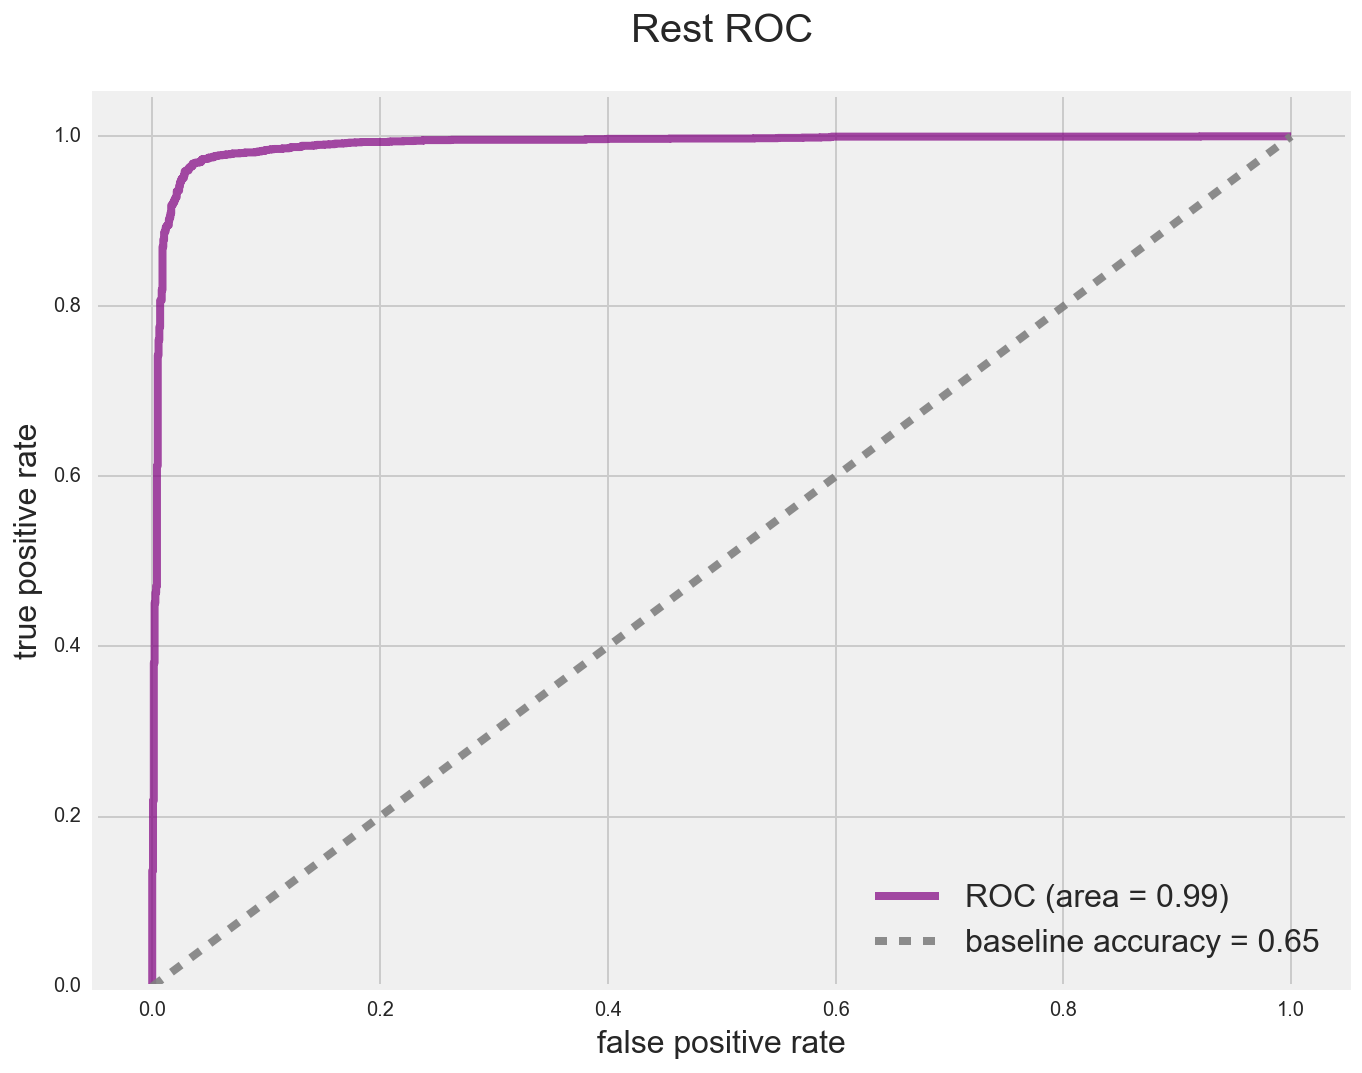

In [234]:
# The restaurants ROC curve is very, very good. This means our model is performing great.
# (Of course, this is the ROC curve on the training data. It would be more appropriate
# to plot this on testing data - but i'm lazy.)
plot_roc('Rest ROC', rest_fpr, rest_tpr, rest_auc, np.mean(rest))

In [235]:
wine_fpr, wine_tpr, wine_auc, wine_prec, wine_rec, wine_avgp, wine_f1 = get_stats(wine_gs.best_estimator_,
                                                                                  Xn, wine)

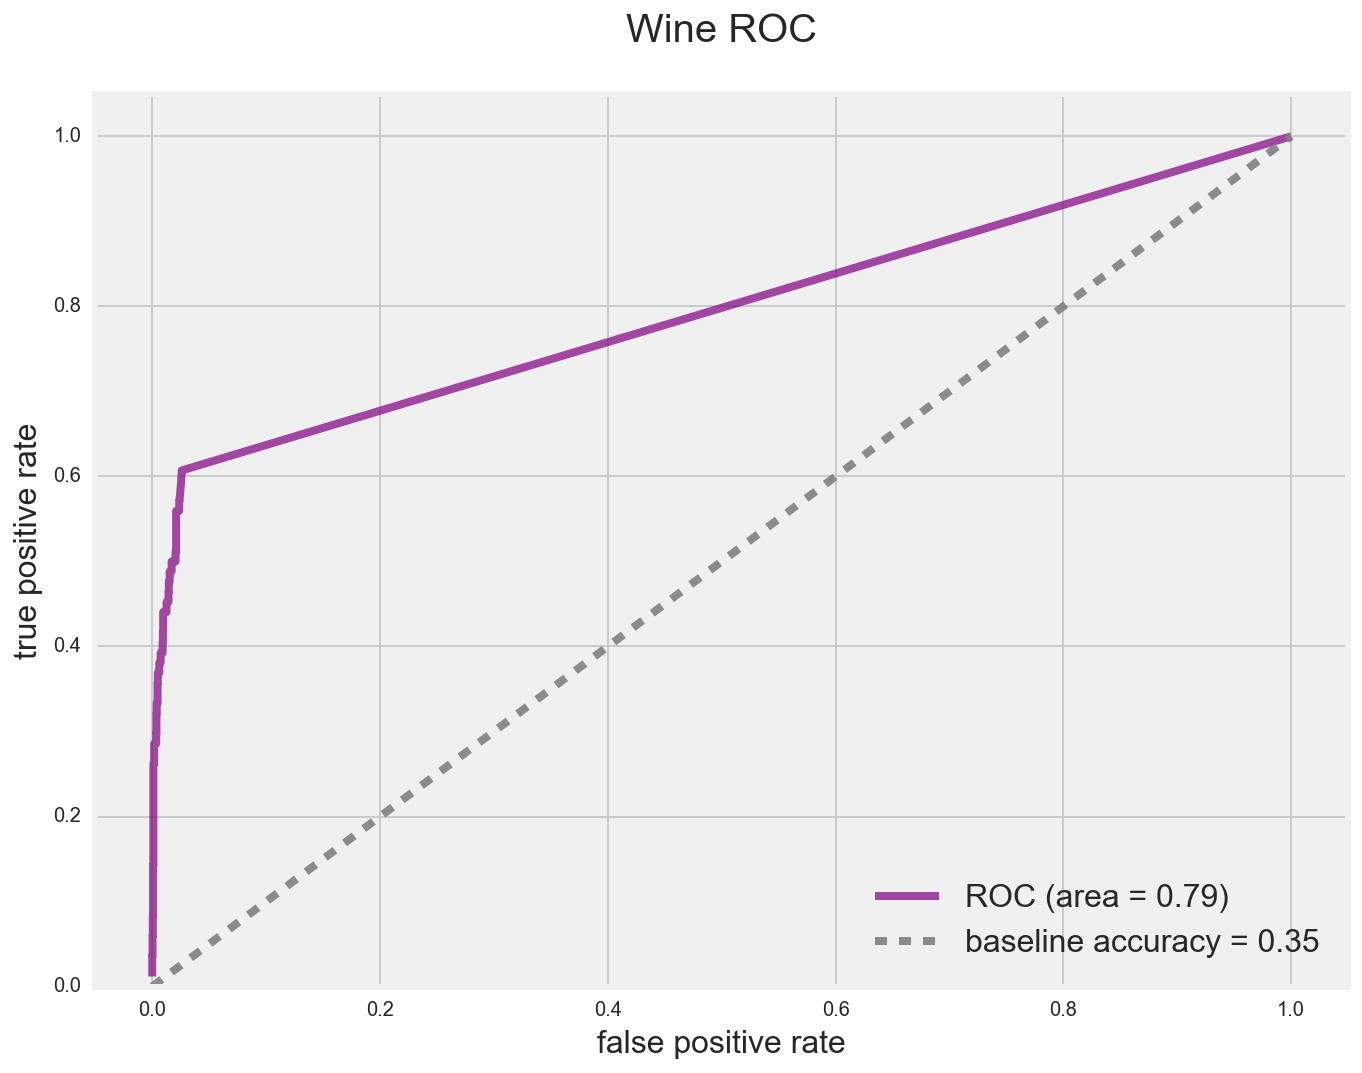

In [236]:
# The Wine ROC is ok, but not as good as the restaurants one. It looks like
# we can get a lot of them correct without much sacrifice in false positive rate,
# but eventually we stop getting them right at a faster rate than 
# false positives increase.
plot_roc('Wine ROC', wine_fpr, wine_tpr, wine_auc, 1.-np.mean(rest))

In [237]:
def plot_pr(title, rec_, pre_, avgp_, f1_):
    
    fig, axr = plt.subplots(figsize=(10,8))

    axr.plot(rec_, pre_, label='Avg. precision (area = %0.2f)' % avgp_,
             color='purple', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall, TP/(TP+FN)', fontsize=16)
    axr.set_ylabel('precision, TP/(TP+FP)', fontsize=16)
    axr.set_title(title+'\n', fontsize=20)

    axr.annotate('F1-score = %0.2f' % f1_, xy=(0.85, 0.85),
                 xycoords='axes fraction',
                 xytext=(0.85, 0.85), textcoords='axes fraction',
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=18, fontweight='bold')

    axr.legend(loc="upper right", fontsize=16)
    
    plt.show()

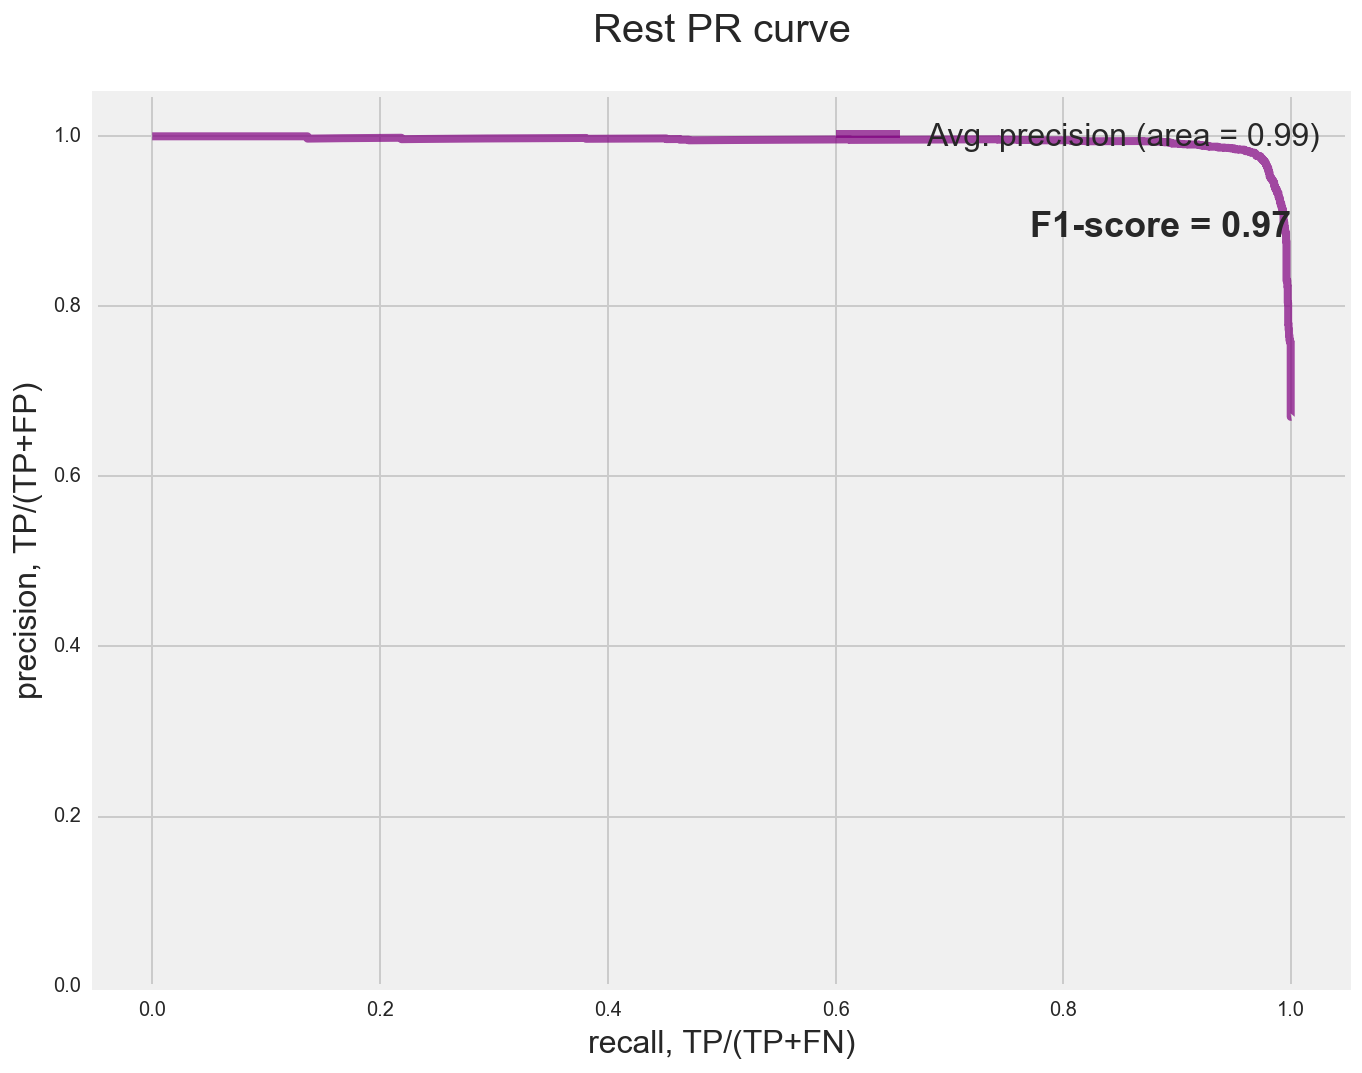

In [238]:
# Precision recall for restaurants is also extremely good.
plot_pr('Rest PR curve', rest_rec, rest_prec, rest_avgp, rest_f1)

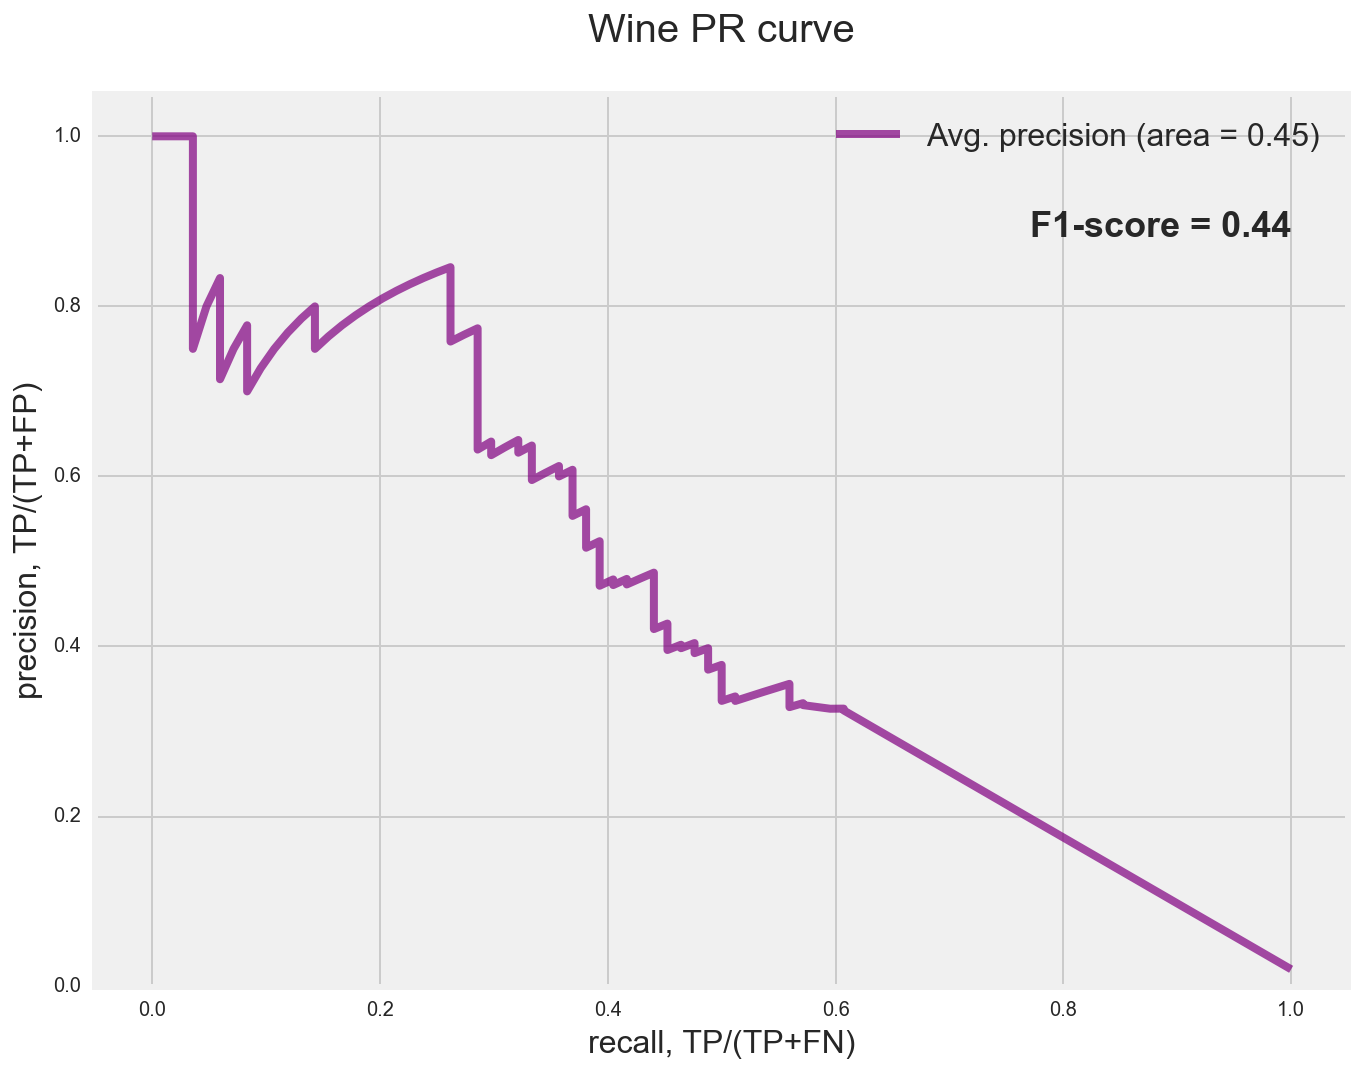

In [239]:
# For wine bars it's not as good. This is saying that we are basically
# trading off our ability to get a given guess that a business is a wine bar
# correct with the amount of wine bars we capture. That is to say, the more
# wine bars we capture, the worse we do at guessing, nearly evenly (in fact,
# it looks like we get worse at guessing correctly faster than we start to
# collect all the true positives out there). 
plot_pr('Wine PR curve', wine_rec, wine_prec, wine_avgp, wine_f1)

In [241]:
# Precision recall is preferable for the wine bar dataset if we are interested specifically
# in how well we detect wine bars, and don't particularly care about getting NOT wine bars
# right in equal measure. 
# For example, it's not that impressive for me to see the name of a business and declare
# that it is not a wine bar without actually seeing it. Most businesses aren't wine bars.
# The more interesting thing is if my guesses that something is a wine bar are correct when
# i guess that they are (precision). Of course, if someone gave me a list of 1000 establishments
# and I only guessed that one was a wine bar once, and I was right, that (while possibly impressive),
# is not punishing me for being overly conservative. That's why we adjust the precision
# by the recall: how many of the wine bars out there was I able to capture when I was guessing?
# For instances where the positive class (wine bar, in this case) is the class of particular 
# interest (not-wine-bars isn't a very interesting "category"), then precision-recall is
# a better metric for looking at performance of a model. With ROC, the classes are both 
# emphasized equally, and so the one that dominates in proportion will also dominate in 
# its impact on the score.